In [2]:
import polars as pl
import pygwalker as pyg
import glob

In [3]:
parquet_files = glob.glob('/mnt/beegfs/project/lobib/data_pq/DB_MBP_10/GEO/*.parquet')

if not parquet_files:
    raise ValueError("No parquet files found in the specified directory")

df = pl.concat([pl.read_parquet(f, use_pyarrow=True) for f in parquet_files[:1]])

In [4]:
df_pandas = df.to_pandas()

In [5]:
walker = pyg.walk(df_pandas)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006285eee0deeceD2qOvAl7GWZdfUwH" style="height: auto">\n    <hea…

In [6]:
# Create a line plot using matplotlib to show trade distribution over time
import matplotlib.pyplot as plt


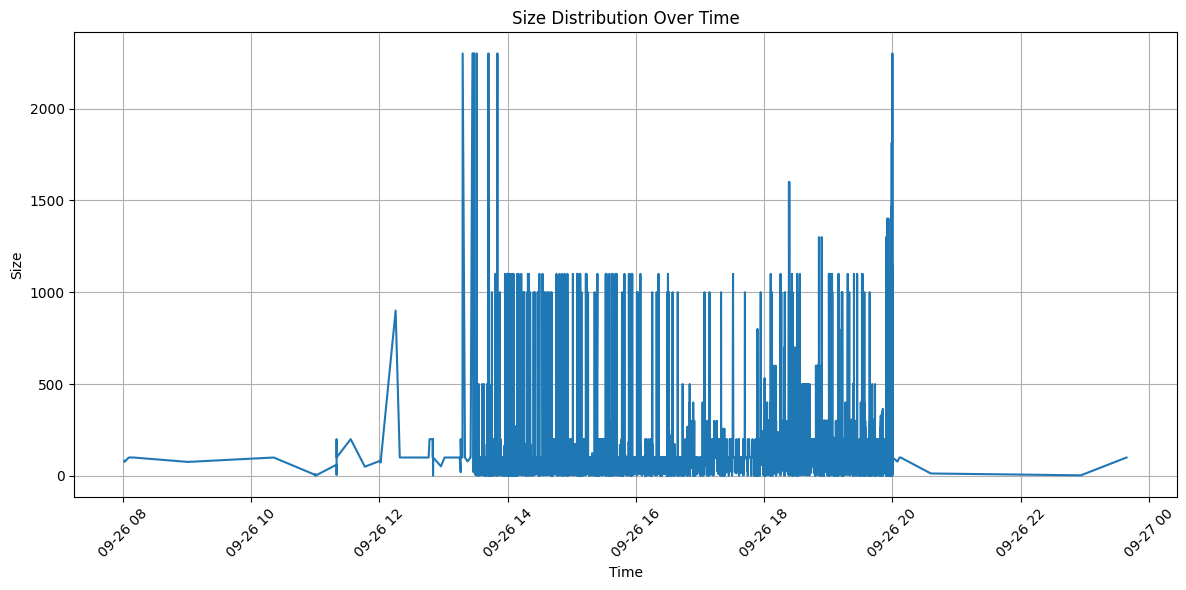

In [8]:
# Filter for trades only
trades_df = df.filter(pl.col('action') == 'trade')

# Create histogram/count plot
plt.figure(figsize=(12, 6))
plt.hist(trades_df['ts_event'], bins=100, density=True)
plt.title('Trade Count Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('Density')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()